In [6]:
import json
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

In [5]:
N=100
dataset = "mnist"
mode = "sparse"
key_search = ["fedavg", "scaffold", "proposal"]

top1_acc = {key: [] for key in key_search}
K_list = [10,20,30,40]

for key in top1_acc.keys():
    
    for K in K_list:
        folder_path = f"../fedtask/{dataset}_{mode}_N{N}_K{K}/{dataset}/{mode}/{N}client/{dataset}_{mode}/"
        for filename in sorted(os.listdir(folder_path)):
            if key in filename:
                data = json.load(open(os.path.join(folder_path, filename), "r"))
                test_acc = data["test_accs"]
                top1_acc[key].append(np.max(test_acc))
                break

print(top1_acc)

{'fedavg': [0.9022, 0.8934, 0.8939, 0.8927], 'scaffold': [0.9257, 0.9222, 0.9208, 0.9206], 'proposal': [0.9399, 0.9353, 0.9388, 0.9109]}


In [11]:
df = pd.DataFrame(top1_acc)
df["participants"] = K_list
df

,fedavg,scaffold,proposal,participants
0,0.9022,0.9257,0.9399,10
1,0.8934,0.9222,0.9353,20
2,0.8939,0.9208,0.9388,30
3,0.8927,0.9206,0.9109,40


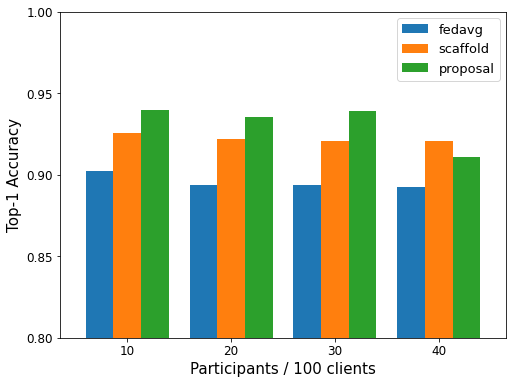

In [29]:
ax = df.plot.bar(x="participants", width=0.8, rot=0, figsize=(8,6))
ax.set_xlabel("Participants / 100 clients", fontsize=15)
ax.set_ylabel("Top-1 Accuracy", fontsize=15)
ax.set_ylim(0.8,1)
ax.set_yticks([0.8,0.85,0.9,0.95,1])
ax.legend(loc="upper right", fontsize=13)

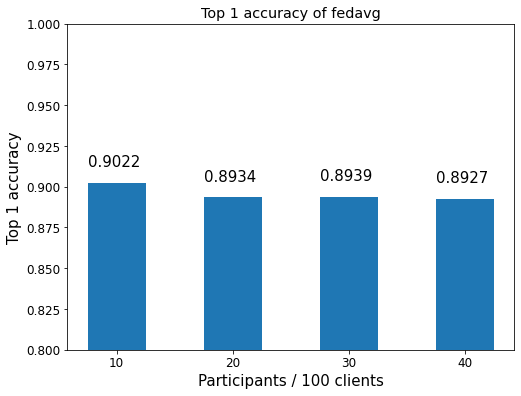

In [3]:
w = 5
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8,6))

plt.bar(x=K_list, height=top1_acc, width=w)
plt.xlabel(f"Participants / {N} clients", fontsize=15)
plt.ylabel(f"Top 1 accuracy", fontsize=15)

for i in range(len(top1_acc)):
    plt.text(x=K_list[i]-w/2, y=top1_acc[i]+0.01, s=str(top1_acc[i]), fontsize=15)

plt.title(f"Top 1 accuracy of {key_search}")
plt.xticks(ticks=K_list)
plt.ylim(0.8,1)
plt.show()